In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid',font_scale=1.5)

In [3]:
data=pd.read_csv('tianchi_mobile_recommend_train_user.csv',dtype=str)
print(data.info())
print(data.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        object
 1   item_id        object
 2   behavior_type  object
 3   user_geohash   object
 4   item_category  object
 5   time           object
dtypes: object(6)
memory usage: 561.1+ MB
None
    user_id    item_id behavior_type user_geohash item_category           time
0  98047837  232431562             1          NaN          4245  2014-12-06 02


In [4]:
print(data.shape)
data=data[0:1000000]
print(data.shape)

(12256906, 6)
(1000000, 6)


In [5]:
missing_rate=data.apply(lambda x:sum(x.isnull())/len(x))
print(missing_rate)

user_id          0.000000
item_id          0.000000
behavior_type    0.000000
user_geohash     0.684227
item_category    0.000000
time             0.000000
dtype: float64


In [6]:
data['date']=data['time'].str[0:10]
data['hour']=data['time'].str[11:]

In [7]:
data['date']=pd.to_datetime(data['date'])
data['time']=pd.to_datetime(data['time'])
data['hour']=data['hour'].astype(np.int8)

In [8]:
print(data.head(1))
print(data.info())

    user_id    item_id behavior_type user_geohash item_category  \
0  98047837  232431562             1          NaN          4245   

                 time       date  hour  
0 2014-12-06 02:00:00 2014-12-06     2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   user_id        1000000 non-null  object        
 1   item_id        1000000 non-null  object        
 2   behavior_type  1000000 non-null  object        
 3   user_geohash   315773 non-null   object        
 4   item_category  1000000 non-null  object        
 5   time           1000000 non-null  datetime64[ns]
 6   date           1000000 non-null  datetime64[ns]
 7   hour           1000000 non-null  int8          
dtypes: datetime64[ns](2), int8(1), object(5)
memory usage: 54.4+ MB
None


In [9]:
data.sort_values(by='time',ascending=True,inplace=True)
print(data.head(10))

          user_id    item_id behavior_type user_geohash item_category  \
482581   34424883  386722637             1          NaN         10392   
523218   48830771  173074466             1          NaN         12919   
168831   53080199  205050656             1          NaN          5894   
554876  120594609  290300635             1          NaN          8901   
162578   73278658  366342762             1          NaN         12161   
381052   77965060   71531708             1          NaN          1230   
63868    39544337  123041948             1          NaN          3064   
336372  121000384  107610729             1          NaN         10984   
6892    117903708  182627801             1          NaN         10725   
427987   31190628  304724023             1          NaN          8877   

             time       date  hour  
482581 2014-11-18 2014-11-18     0  
523218 2014-11-18 2014-11-18     0  
168831 2014-11-18 2014-11-18     0  
554876 2014-11-18 2014-11-18     0  
162578 2014

In [10]:
print(data.info())
print(data.tail(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 482581 to 246017
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   user_id        1000000 non-null  object        
 1   item_id        1000000 non-null  object        
 2   behavior_type  1000000 non-null  object        
 3   user_geohash   315773 non-null   object        
 4   item_category  1000000 non-null  object        
 5   time           1000000 non-null  datetime64[ns]
 6   date           1000000 non-null  datetime64[ns]
 7   hour           1000000 non-null  int8          
dtypes: datetime64[ns](2), int8(1), object(5)
memory usage: 62.0+ MB
None
          user_id    item_id behavior_type user_geohash item_category  \
616585   68961612  235412606             1          NaN          7572   
206750   47551029  238563775             1          NaN          6344   
381714   25330254  179987399             1          NaN      

In [11]:
print(data.describe(include='all'))

C:\Users\gdmmx\AppData\Local\Temp/ipykernel_6820/575933638.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data.describe(include='all'))


         user_id    item_id behavior_type user_geohash item_category  \
count    1000000    1000000       1000000       315773       1000000   
unique      8058     673013             4       165011          7034   
top     36233277  112921337             1      94ek6lw          1863   
freq        3117        126        942230          101         32445   
first        NaN        NaN           NaN          NaN           NaN   
last         NaN        NaN           NaN          NaN           NaN   
mean         NaN        NaN           NaN          NaN           NaN   
std          NaN        NaN           NaN          NaN           NaN   
min          NaN        NaN           NaN          NaN           NaN   
25%          NaN        NaN           NaN          NaN           NaN   
50%          NaN        NaN           NaN          NaN           NaN   
75%          NaN        NaN           NaN          NaN           NaN   
max          NaN        NaN           NaN          NaN          

In [12]:
data.reset_index(drop=True,inplace=True)

In [13]:
#pv是page view  uv是unique visitor
pv_daily=data.groupby('date').count()['user_id']
print(pv_daily)

date
2014-11-18    30026
2014-11-19    29135
2014-11-20    29209
2014-11-21    26787
2014-11-22    29831
2014-11-23    30908
2014-11-24    30850
2014-11-25    29944
2014-11-26    29283
2014-11-27    29812
2014-11-28    28553
2014-11-29    30191
2014-11-30    33342
2014-12-01    32210
2014-12-02    33002
2014-12-03    33467
2014-12-04    32642
2014-12-05    29888
2014-12-06    31658
2014-12-07    32657
2014-12-08    31296
2014-12-09    32242
2014-12-10    34039
2014-12-11    39687
2014-12-12    56611
2014-12-13    33241
2014-12-14    33134
2014-12-15    32842
2014-12-16    32438
2014-12-17    31358
2014-12-18    29717
Name: user_id, dtype: int64


In [14]:
pv_daily=pv_daily.rename(('user_id1'))

In [15]:
uv_daily=data.groupby('date')['user_id'].apply(lambda x:x.drop_duplicates().count())
print(uv_daily)

date
2014-11-18    4078
2014-11-19    4078
2014-11-20    4087
2014-11-21    3957
2014-11-22    3931
2014-11-23    4101
2014-11-24    4184
2014-11-25    4087
2014-11-26    4076
2014-11-27    4061
2014-11-28    3945
2014-11-29    4043
2014-11-30    4202
2014-12-01    4219
2014-12-02    4274
2014-12-03    4343
2014-12-04    4252
2014-12-05    4091
2014-12-06    4160
2014-12-07    4222
2014-12-08    4267
2014-12-09    4258
2014-12-10    4340
2014-12-11    4682
2014-12-12    5431
2014-12-13    4409
2014-12-14    4319
2014-12-15    4386
2014-12-16    4378
2014-12-17    4281
2014-12-18    4185
Name: user_id, dtype: int64


In [16]:
uv_daily=data.groupby(by='date').nunique('user_id')['user_id']
print(uv_daily)

date
2014-11-18    4078
2014-11-19    4078
2014-11-20    4087
2014-11-21    3957
2014-11-22    3931
2014-11-23    4101
2014-11-24    4184
2014-11-25    4087
2014-11-26    4076
2014-11-27    4061
2014-11-28    3945
2014-11-29    4043
2014-11-30    4202
2014-12-01    4219
2014-12-02    4274
2014-12-03    4343
2014-12-04    4252
2014-12-05    4091
2014-12-06    4160
2014-12-07    4222
2014-12-08    4267
2014-12-09    4258
2014-12-10    4340
2014-12-11    4682
2014-12-12    5431
2014-12-13    4409
2014-12-14    4319
2014-12-15    4386
2014-12-16    4378
2014-12-17    4281
2014-12-18    4185
Name: user_id, dtype: int64


In [17]:
pv_uv_daily=pd.concat([pv_daily,uv_daily],axis=1)
pv_uv_daily.rename(columns={'user_id1':'pv','user_id':'uv'},inplace=True)
print(pv_uv_daily.head())

               pv    uv
date                   
2014-11-18  30026  4078
2014-11-19  29135  4078
2014-11-20  29209  4087
2014-11-21  26787  3957
2014-11-22  29831  3931


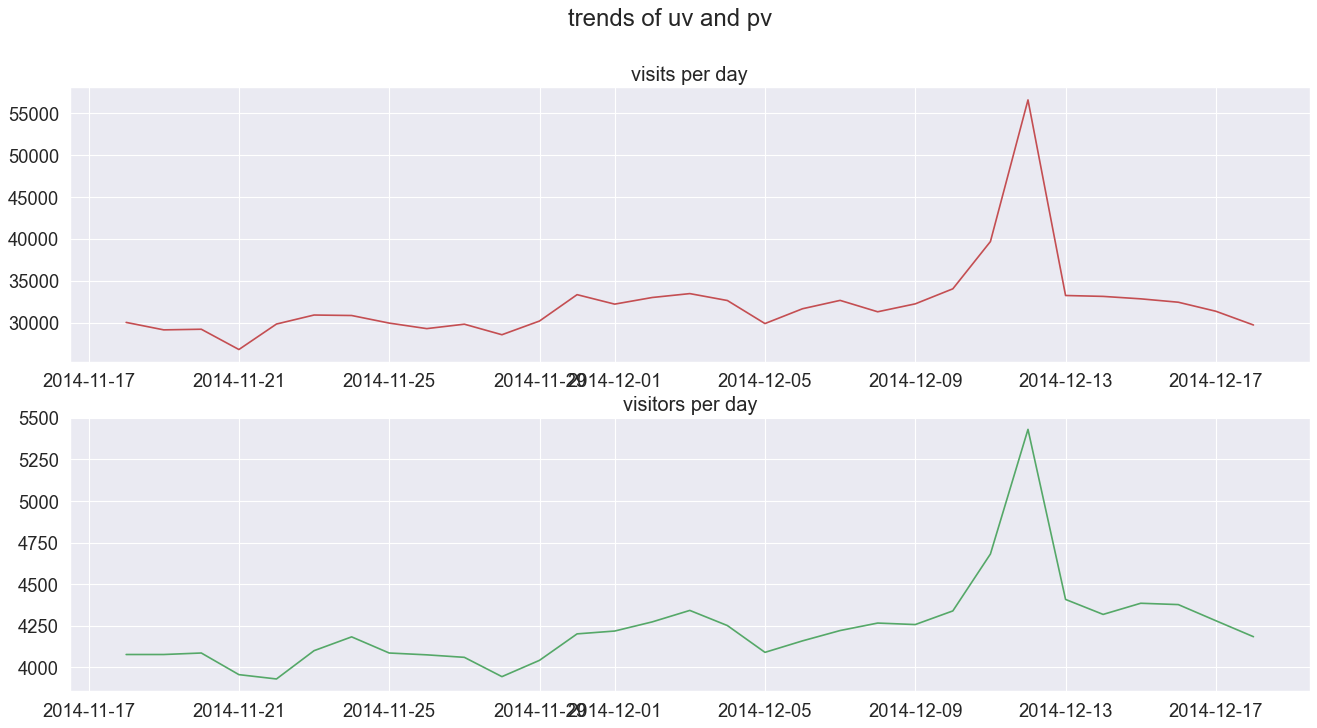

In [18]:
plt.figure(figsize=(20,10),dpi=80)
plt.subplot(211)
plt.plot(pv_daily,color='r')
plt.title('visits per day')
plt.subplot(212)
plt.plot(uv_daily,color='g')
plt.title('visitors per day')
plt.suptitle('trends of uv and pv')
plt.show()

In [ ]:
pv_hour=data.groupby(by='hour').count()['user_id']
uv_hour=data.groupby(by='hour').nunique('user_id')['user_id']
print(pv_hour.head())
print(uv_hour.head())

In [ ]:
pv_uv_hour=pd.concat([pv_hour,uv_hour],axis=1)
pv_uv_hour.columns=['pv_hour','uv_hour']

In [ ]:
plt.figure(figsize=(16,9))
pv_uv_hour['pv_hour'].plot(color= 'steelblue', label ='pv per hour')
plt.legend(loc ='upper center')
plt.ylabel('visits number')
pv_uv_hour['uv_hour'].plot(color= 'red', label='uv per hour',secondary_y =True)
plt.ylabel('visitor number')
plt.xticks(range(0,24),pv_uv_hour.index)
plt.legend(loc ='upper center')
plt.grid(True)
plt.show()

In [ ]:
pv_detail=pd.pivot_table(columns='behavior_type',index='hour',data=data,
                         values='user_id',aggfunc=np.size)
print(pv_detail)

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=pv_detail.iloc[:,1:])
plt.show()

In [ ]:
#average revenue per unit=ARPU
#average revenue per paying unit=ARPPU
user_buy=data[data.behavior_type=='4'].groupby('user_id').size()
print(user_buy)
print(user_buy.describe())

In [ ]:
plt.hist(x=user_buy,bins=30)
plt.show()

In [ ]:
plt.hist(x=user_buy[user_buy<=10],bins=10)
plt.show()

In [ ]:
arpu=user_buy.sum()*100/1000000
print(arpu)

In [ ]:
arppu=user_buy.sum()*100/user_buy.shape[0]
print(arppu)

In [ ]:
user_buy1=data[data.behavior_type=='4'].groupby(['date','user_id']).count()['behavior_type']\
    .reset_index().rename(columns={'behavior_type':'total'})
print(user_buy1)

In [ ]:
user_buy2=user_buy1.groupby('date').sum()['total']/user_buy1.groupby('date').count()['total']
print(user_buy2)
user_buy2.plot()
plt.show()

In [ ]:
user_buy2.describe()

In [ ]:
data['operation']=1


In [ ]:
user_buy2 = data.groupby(['date' , 'user_id' , 'behavior_type'])['operation'].count().reset_index().rename(columns ={'operation':'total'})
print(user_buy2)

In [ ]:
user_buy2.groupby('date').apply(lambda x:x[x.behavior_type=='4'].total.sum()/len(x.user_id.unique()))

In [ ]:
user_buy2.groupby('date').apply(lambda x:x[x.behavior_type=='4'].total.sum()/len(x.user_id.unique())).plot()

In [ ]:
user_buy2.groupby('date').apply(lambda x:x[x.behavior_type=='4'].total.count()/len(x.user_id.unique())).plot()

In [ ]:
user_buy3=data[data['behavior_type']=='4'].groupby(['date','hour'])['operation'].sum()
print(user_buy3)

In [ ]:
user_buy4=user_buy3['2014-11-18']
print(user_buy4)

In [ ]:
plt.plot(user_buy4.index,user_buy4.values)
plt.show()

In [ ]:
for i in data[data.behavior_type=='4'].groupby('user_id')['date']:
    print(i)
    break

In [ ]:
data_rebuy=data[data.behavior_type =='4' ].groupby('user_id')['date'].apply(lambda x: len(x.unique()))
print(data_rebuy)
data_rebuy.describe()
rebuy_rate=data_rebuy[data_rebuy>1].count()/data_rebuy.count()
print(rebuy_rate)

In [ ]:
data_day_buy=data[data.behavior_type=='4'].groupby('user_id').date.apply(lambda x:x.sort_values()).diff(1).dropna()
print(data_day_buy)

In [ ]:
user_count=data.groupby('behavior_type').size()
print(user_count)

In [ ]:
pv_all=data['user_id'].count()
print(pv_all)

In [ ]:
click_rate=(user_count[0]-user_count[2])/pv_all
print(click_rate)

In [ ]:
print(data.head())